<a href="https://colab.research.google.com/github/kedilayanaveen10/EDACarData/blob/master/EDACarData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Introduction








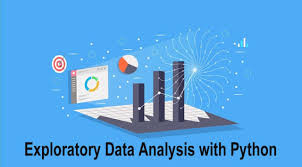

Sometimes even the things we see with our naked eyes is not the “naked” truth. It needs time,conviction and certainty to get behind the truth. EDA — Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format. EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists. It performs to define and refine our important features variable selection, that will be used in our model.

# 1. Importing required libraries


In [66]:
#Run the below command to install required dependency (used for Groupby Imputer). 
#!pip install mlmachine

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Loading the Dataset

In [116]:
carData = pd.read_csv('data.csv')

## 1.2 Statistics of the Dataset

In [117]:
carData.shape

(11914, 16)

In [118]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [119]:
carData.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#2. Finding percentage of null entries for each attribute

In [120]:
#Find % of missing data
print((carData.isnull().sum()/len(carData)) * 100)

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64


## 2.1 Dropping irrelevant columns and columns with large amount of missing data can help improve the accuracy of the model.

We can see that Market Category has 31% of data missing. Hence it would be reasonable to drop that attribute as it would be difficult to fill in the missing values.

In [121]:
#Drop attribute Market Category
carData = carData.drop('Market Category',1)

As the number of doors in a car do not affect the price too much, it can be dropped without losing much.

In [122]:
carData = carData.drop('Number of Doors', 1)

# 3. Renaming columns.

Renaming the attributes will help in better understanding of the dataset.

In [123]:
carData = carData.rename(columns={"Engine HP": "HP", "Engine Fuel Type": "Fuel Type", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
carData.head(5)

,Make,Model,Year,Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


#4. Deleting duplicates. 

Datset of this size will be computationally expensive when training on a model. So it would be better to reduce the size of dataset without losing any information. Deleting duplicates reduces the size of the dataset without losing any information.

In [124]:
carData = carData.drop_duplicates()
print(carData.shape)

(11193, 14)


#5. Detecting and removing outliers.

Outliers in the dataset can affect the imputation of missing values and also the learning model. It would be better for our learning model to remove the outliers which does not help out learning model.

## 5.1 Detecting Outliers.

We can use BoxPlot to detect outliers.

<AxesSubplot:xlabel='Price'>

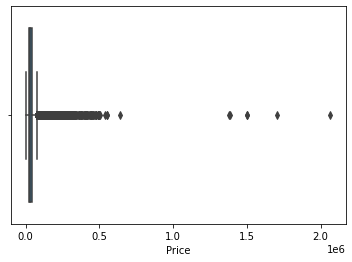

In [125]:
sns.boxplot(x=carData['Price'])

<AxesSubplot:xlabel='HP'>

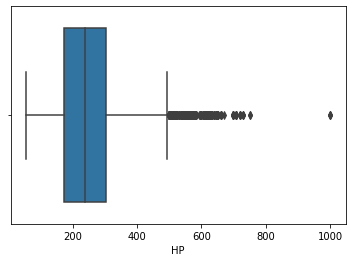

In [126]:
sns.boxplot(x=carData['HP'])

<AxesSubplot:xlabel='Cylinders'>

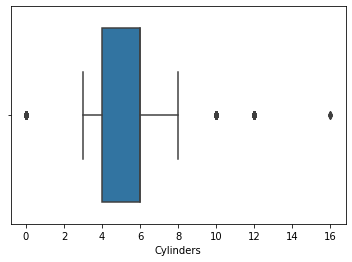

In [127]:
sns.boxplot(x=carData['Cylinders'])

<AxesSubplot:xlabel='MPG-H'>

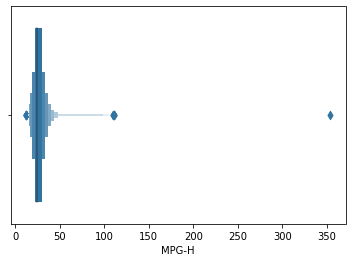

In [128]:
sns.boxenplot(x=carData['MPG-H'])

<AxesSubplot:xlabel='MPG-C'>

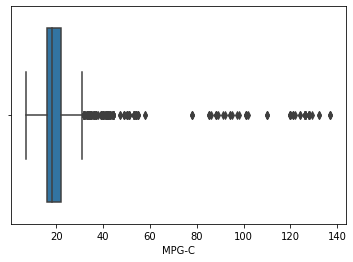

In [129]:
sns.boxplot(x=carData['MPG-C'])

<AxesSubplot:xlabel='Popularity'>

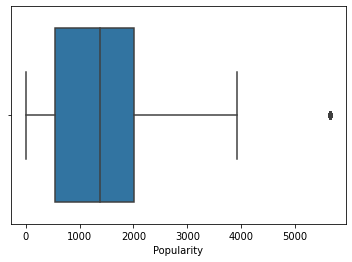

In [130]:
sns.boxplot(x=carData['Popularity'])

## 5.2 Removing outliers

There are many different ways to deal with outliers. Here IQR method is used to remove the outliers. 

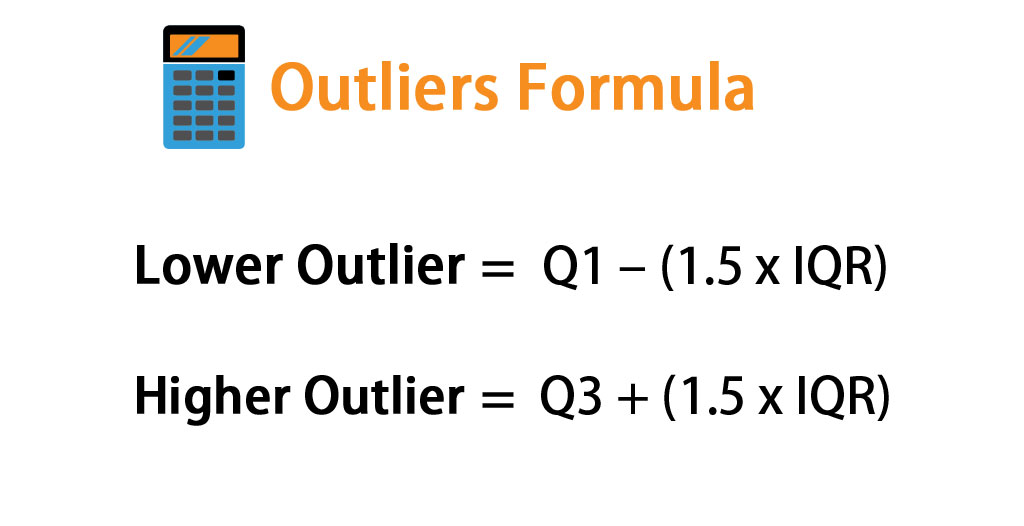

In [131]:
Q1 = carData.quantile(0.25)
Q3 = carData.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              131.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21440.0
dtype: float64


In [132]:
carData = carData[~((carData < (Q1 - 1.5 * IQR)) |(carData > (Q3 + 1.5 * IQR))).any(axis=1)]
print(carData.shape)

(8641, 14)


# 6. Imputing Missing Values

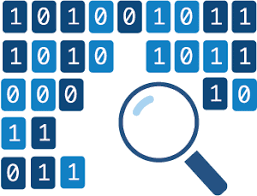

*The idea of imputation is both seductive and dangerous. It is seductive because it can lull the user into the pleasurable state of believing that the data are complete after all, and it is dangerous because it lumps together situations where the problem is sufficiently minor that it can be legitimately handled in this way and situations where standard estimators applied to the real and imputed data have substantial biases 
                  [Little and Rubin, 2019].*

Dropping the datapoints having missing values might also result in losing valuable data. It would be better to impute the missing values. We can also build a ML model to predict the missing values. But here a simple GroupbyImputer is used.

In [133]:
from mlmachine.features.preprocessing import GroupbyImputer

Engine Fuel type missing values can be imputed by using the most common engine fuel type used by the respective company

In [134]:
imputeFuelType = GroupbyImputer(null_column='Fuel Type', groupby_column='Make', strategy='most_frequent')
newEngineFuelType = imputeFuelType.fit_transform(carData)

carData['Fuel Type'] = newEngineFuelType
#Find % of missing data
print((carData.isnull().sum()/len(carData)) * 100)


Make             0.000000
Model            0.000000
Year             0.000000
Fuel Type        0.000000
HP               0.127300
Cylinders        0.219882
Transmission     0.000000
Drive Mode       0.000000
Vehicle Size     0.000000
Vehicle Style    0.000000
MPG-H            0.000000
MPG-C            0.000000
Popularity       0.000000
Price            0.000000
dtype: float64


The missing values of Engine HP can be imputed.
The mean of values after grouping by attributes 'Make' and 'Engine Fuel Type' is more meaningful to use as the impute value.

In [135]:
 carData["HP"] = carData.groupby(['Make','Fuel Type']).transform(lambda x: x.fillna(x.mean()))
#Find % of missing data
print((carData.isnull().sum()/len(carData)) * 100)


Make             0.000000
Model            0.000000
Year             0.000000
Fuel Type        0.000000
HP               0.000000
Cylinders        0.219882
Transmission     0.000000
Drive Mode       0.000000
Vehicle Size     0.000000
Vehicle Style    0.000000
MPG-H            0.000000
MPG-C            0.000000
Popularity       0.000000
Price            0.000000
dtype: float64


As the number of cylinders in an engine increases, the HP of the engine also increases. Hence it would be reasonable to impute the missing Engine Cylinders values using the most common values for the respective Engine HP.

In [136]:
imputeCylinder = GroupbyImputer(null_column='Cylinders', groupby_column='HP', strategy='most_frequent')
newCylinder = imputeCylinder.fit_transform(carData)

carData['Cylinders'] = newCylinder
#Find % of missing data
print((carData.isnull().sum()/len(carData)) * 100)


Make             0.0
Model            0.0
Year             0.0
Fuel Type        0.0
HP               0.0
Cylinders        0.0
Transmission     0.0
Drive Mode       0.0
Vehicle Size     0.0
Vehicle Style    0.0
MPG-H            0.0
MPG-C            0.0
Popularity       0.0
Price            0.0
dtype: float64


#7. Displaying top car brands.

Now all the missing data have been imputed, outliers have been removed, irrelevant attributes have been dropped. Hence the dataset should be good for EDA and training a model.

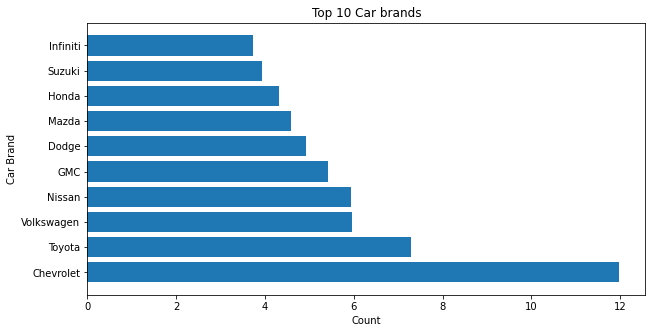

In [137]:
# Percentage of car per brand
counts = carData['Make'].value_counts()*100/sum(carData['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.xlabel('Count')
plt.ylabel('Car Brand')
plt.show()

##7.1 Displaying the average prices of the top car brands.

In [138]:
prices = carData[['Make','Price']].loc[(carData['Make'] == 'Chevrolet')|
               (carData['Make'] == 'Toyota')|
               (carData['Make'] == 'Volkswagen')|
               (carData['Make'] == 'Nissan')|
               (carData['Make'] == 'GMC')|
               (carData['Make'] == 'Dodge')|
               (carData['Make'] == 'Mazda')|
               (carData['Make'] == 'Honda')|
               (carData['Make'] == 'Suzuki')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28252.488395
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Suzuki      18168.241888
Toyota      29011.750397
Volkswagen  29032.817476


#8. Correlation Matrix

In [139]:
carData.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,1.000000,-0.093987,0.359710,0.323573,0.204511,0.592328
HP,1.000000,1.000000,-0.093987,0.359710,0.323573,0.204511,0.592328
Cylinders,-0.093987,-0.093987,1.000000,-0.697109,-0.749973,0.025527,0.391685
MPG-H,0.359710,0.359710,-0.697109,1.000000,0.937950,0.081968,-0.127234
MPG-C,0.323573,0.323573,-0.749973,0.937950,1.000000,0.071769,-0.201798
Popularity,0.204511,0.204511,0.025527,0.081968,0.071769,1.000000,0.115812
Price,0.592328,0.592328,0.391685,-0.127234,-0.201798,0.115812,1.000000


<AxesSubplot:>

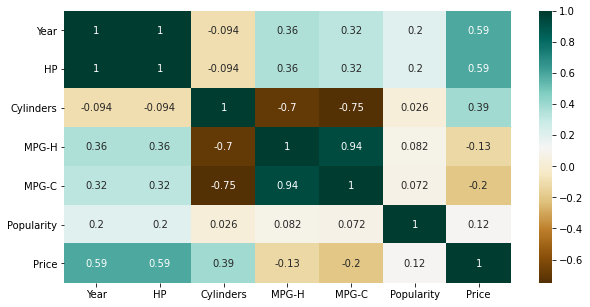

In [140]:
plt.figure(figsize=(10,5))
c = carData.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

From the above correaltion heatmap we can find the following correlations:

-HP and Year are highly correlated

-Highway MPG and Cylinders are highly negatively correlated

-City MPG and Cylinders are highly negatively correlated

-Highway MPG and City MPG are highly correlated(This is probably the most obvious correlation XD )

#9. Plots between different attributes.

## 9.1 HP vs Price

A scatter plot between HP and Price shows as lower HP cars have lower Prices than higher HP cars.

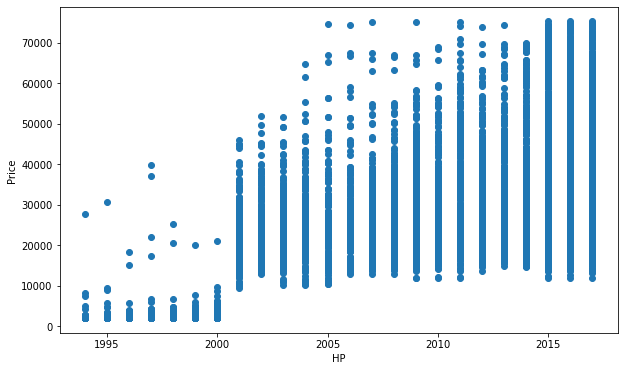

In [141]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(carData['HP'],carData['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## 9.2 City MPG vs Price

A scatter plot between City MPG and Price shows that cars that have lower MPG are costlier. This makes sense as cars like Ferrari are costlier than normal cars, but have lower MPG.

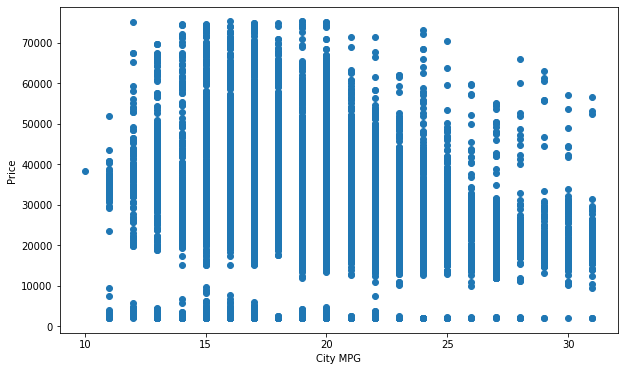

In [142]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(carData['MPG-C'],carData['Price'])
ax.set_xlabel('City MPG')
ax.set_ylabel('Price')
plt.show()

## 9.3 Year vs Price

A bar graph of Year vs mean prices of that year shows that the cost of cars has significantly increased since the year 2000.

<AxesSubplot:xlabel='Year'>

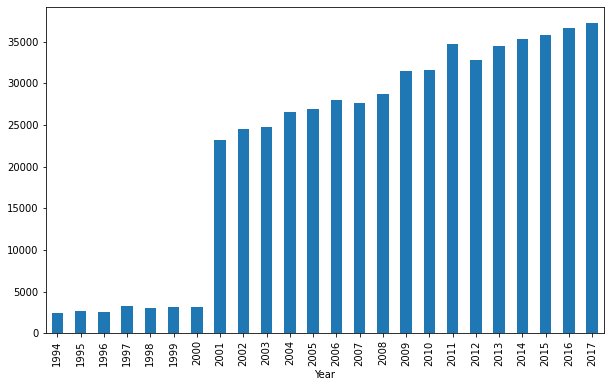

In [143]:
carData1 = carData.groupby(['Year'])['Price'].mean()

carData1.plot(kind='bar',figsize=(10,6))

## 9.4 Make vs Price

A bar graph of Car Manufacturer vs mean prices of that manufacturer shows the average prices of each car manufacturer.

<AxesSubplot:xlabel='Make'>

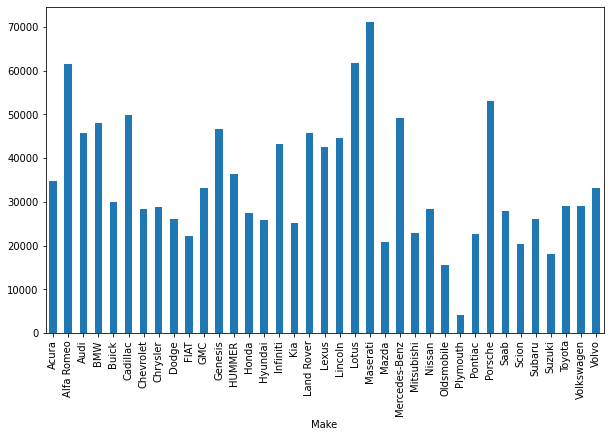

In [144]:
carData1 = carData.groupby(['Make'])['Price'].mean()

carData1.plot(kind='bar', figsize=(10,6))

## 9.5 Vehicle Size vs Price

The bar graph of Vehicle Size vs Price shows the obvious relation between Vehicle Size and Price. Large cars are costlier than Compact cars.

<AxesSubplot:xlabel='Vehicle Size'>

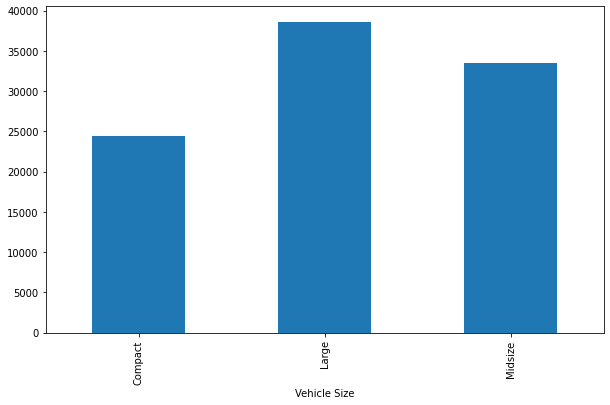

In [145]:
carData1 = carData.groupby(['Vehicle Size'])['Price'].mean()

carData1.plot(kind='bar', figsize=(10,6))

## 9.6 Vehicle Style vs Count

A bar plot of Count of cars sold for each Vehicle Style shows that Sedan and 4 door SUVs are the most common vehicles among the customers.

Text(0, 0.5, 'Vehicle Count')

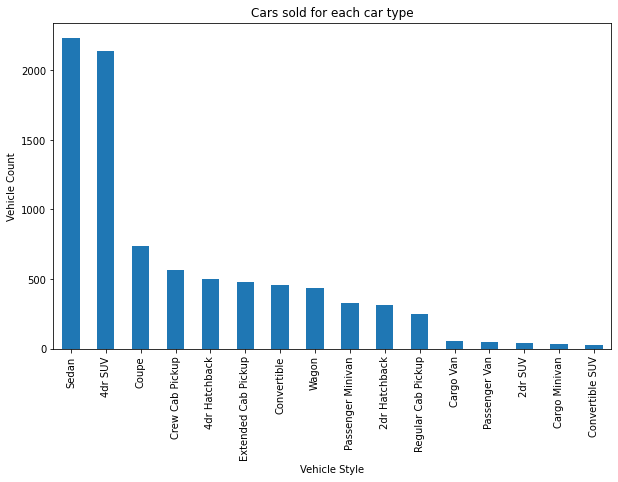

In [146]:
carData['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title('Cars sold for each car type')
plt.xlabel('Vehicle Style')
plt.ylabel('Vehicle Count')

## 9.7 Vehicle Style vs Drive Mode

Text(0, 0.5, 'Vehicle Style')

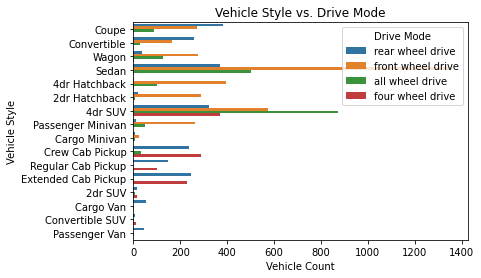

In [147]:
sns.countplot(y='Vehicle Style', data=carData, hue='Drive Mode')
plt.title('Vehicle Style vs. Drive Mode')
plt.xlabel('Vehicle Count')
plt.ylabel('Vehicle Style')

# 10. Encoding of Categorical Data

A big part of the preprocessing is something encoding. This means representing each piece of data in a way that the computer can understand, hence the name encode, which literally means “convert to computer code”. There’s many different ways of encoding such as Label Encoding, or as you might of guessed, One Hot Encoding.

In [148]:
X = carData.iloc[:,:-1]
y = carData.iloc[:,-1]

In [149]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8641 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           8641 non-null   object 
 1   Model          8641 non-null   object 
 2   Year           8641 non-null   int64  
 3   Fuel Type      8641 non-null   object 
 4   HP             8641 non-null   float64
 5   Cylinders      8641 non-null   float64
 6   Transmission   8641 non-null   object 
 7   Drive Mode     8641 non-null   object 
 8   Vehicle Size   8641 non-null   object 
 9   Vehicle Style  8641 non-null   object 
 10  MPG-H          8641 non-null   int64  
 11  MPG-C          8641 non-null   int64  
 12  Popularity     8641 non-null   int64  
 13  Price          8641 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


We can see that there are a few Categorical data present in the dataset. We need to Encode the categorical dataset to be able to feed into a learning algorithm, as most of the learning models need numerical data.

It is preferred to use OneHotEncoding for nominal data as long as the number of new features added is not too high.

For ordinal data a LabelEncoder will do a good job.

##10.1 OneHotEncoding

OneHotEncoding creates as many new features as there are unique values in the attribute. Hence we should apply OneHotEncoding to only those attributes which are nominal and have few unique values.

Considering above contraints we can apply OneHotEncoding for attributes : Make, Fuel Type, Transmission, Drive Mode

In [150]:
oneHotFeatures = ['Make','Fuel Type','Transmission','Drive Mode']

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

for feature in oneHotFeatures:
    X = encode_and_bind(X, feature)

X.shape

(8641, 63)

In [151]:
X.head()

,Model,Year,HP,Cylinders,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Saab,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Fuel Type_diesel,Fuel Type_flex-fuel (premium unleaded recommended/E85),Fuel Type_flex-fuel (premium unleaded required/E85),Fuel Type_flex-fuel (unleaded/E85),Fuel Type_flex-fuel (unleaded/natural gas),Fuel Type_natural gas,Fuel Type_premium unleaded (recommended),Fuel Type_premium unleaded (required),Fuel Type_regular unleaded,Transmission_AUTOMATED_MANUAL,Transmission_AUTOMATIC,Transmission_MANUAL,Transmission_UNKNOWN,Drive Mode_all wheel drive,Drive Mode_four wheel drive,Drive Mode_front wheel drive,Drive Mode_rear wheel drive
0,1 Series M,2011,2011.0,6.0,Compact,Coupe,26,19,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,1 Series,2011,2011.0,6.0,Compact,Convertible,28,19,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1 Series,2011,2011.0,6.0,Compact,Coupe,28,20,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1 Series,2011,2011.0,6.0,Compact,Coupe,28,18,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,1 Series,2011,2011.0,6.0,Compact,Convertible,28,18,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


##10.2 Label Encoding

Label encoding is intuitive and easy to understand.

Let’s assume we’re working with categorical data, like cats and dogs. Looking at the name of label encoding, you might be able to guess that it encodes labels, where label is just a category (i.e. cat or dog), and encode just means giving them a number to represent that category (1 for cat and 2 for dog). By giving each category a number, the computer now knows how to represent them, since the computer knows how to work with numbers. 

The problem is that with label encoding, the categories now have natural ordered relationships. The computer does this because it’s programmed to treat higher numbers as higher numbers; it will naturally give the higher numbers higher weights.

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[['Model','Vehicle Size','Vehicle Style']] = carData[['Model','Vehicle Size','Vehicle Style']].apply(le.fit_transform)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8641 entries, 0 to 11913
Data columns (total 63 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Model                                                   8641 non-null   int64  
 1   Year                                                    8641 non-null   int64  
 2   HP                                                      8641 non-null   float64
 3   Cylinders                                               8641 non-null   float64
 4   Vehicle Size                                            8641 non-null   int64  
 5   Vehicle Style                                           8641 non-null   int64  
 6   MPG-H                                                   8641 non-null   int64  
 7   MPG-C                                                   8641 non-null   int64  
 8   Popularity                           

In [153]:
X.head()

,Model,Year,HP,Cylinders,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Saab,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Fuel Type_diesel,Fuel Type_flex-fuel (premium unleaded recommended/E85),Fuel Type_flex-fuel (premium unleaded required/E85),Fuel Type_flex-fuel (unleaded/E85),Fuel Type_flex-fuel (unleaded/natural gas),Fuel Type_natural gas,Fuel Type_premium unleaded (recommended),Fuel Type_premium unleaded (required),Fuel Type_regular unleaded,Transmission_AUTOMATED_MANUAL,Transmission_AUTOMATIC,Transmission_MANUAL,Transmission_UNKNOWN,Drive Mode_all wheel drive,Drive Mode_four wheel drive,Drive Mode_front wheel drive,Drive Mode_rear wheel drive
0,1,2011,2011.0,6.0,0,8,26,19,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,0,2011,2011.0,6.0,0,6,28,19,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0,2011,2011.0,6.0,0,8,28,20,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,0,2011,2011.0,6.0,0,8,28,18,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,2011,2011.0,6.0,0,6,28,18,3916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


# 11. Splitting the dataset into Train and Test set

The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## 11.1 Scaling the train and test values.

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem.
If left alone, these algorithms only take in the magnitude of features neglecting the units. The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.


In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

# 12. Training different Learning algorithms on the dataset.

Learning algorithms are compared using their R2 score along with Mean Absolute Error(MAE), Mean Square Error(MSE), Root Mean Square Error(RMSE).

The different Regression algorithms used here are:

1.Linear Regression

2.KNN Regression

3.Decision Tree

4.Random Forest

5.XGBoost

## 12.1 Linear Regression

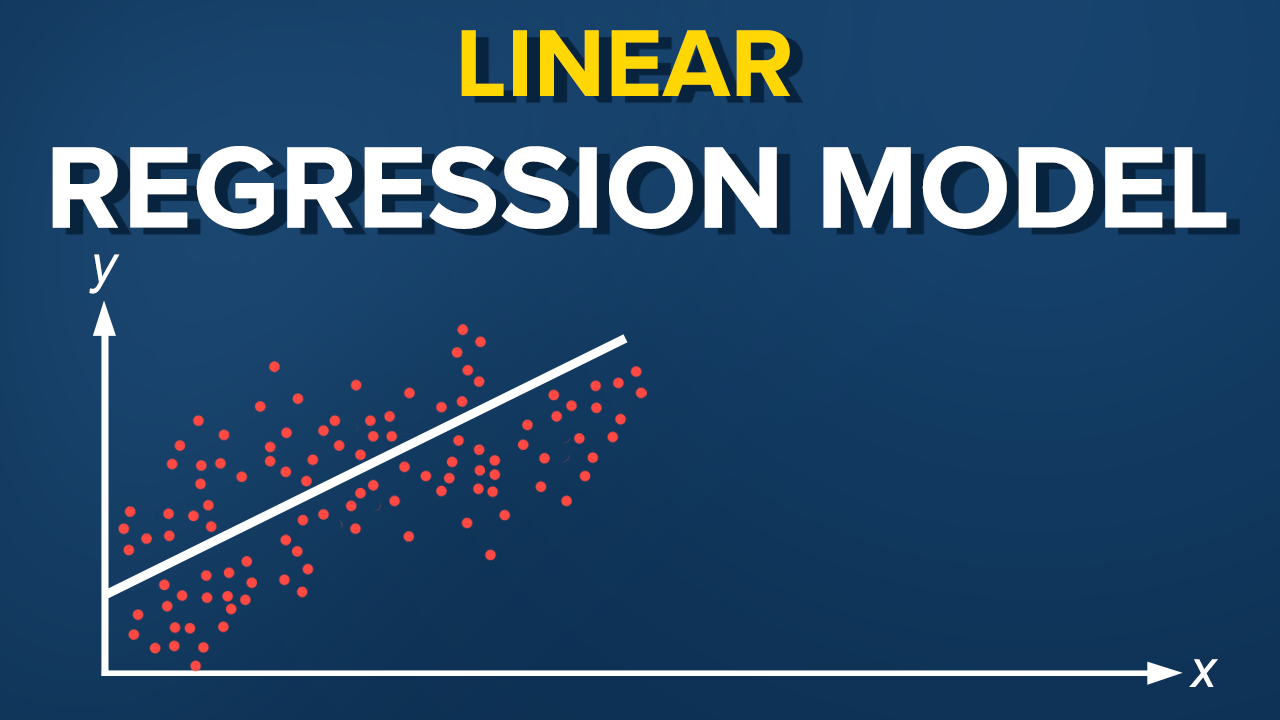

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is malignant or benign is a classification problem.

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linRegressor = LinearRegression()
linRegressor.fit(X_train,y_train)
y_pred = linRegressor.predict(X_test)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

LR_r2Score = metrics.r2_score(y_test,y_pred)
print('R2 score: ', LR_r2Score)

Mean Absolute Error:  0.35305789179382185
Mean Squared Error:  0.2103042897024519
Root Mean Squared Error:  0.4585894565975671
R2 score:  0.7845304153388528


## 12.2 KNN Regression

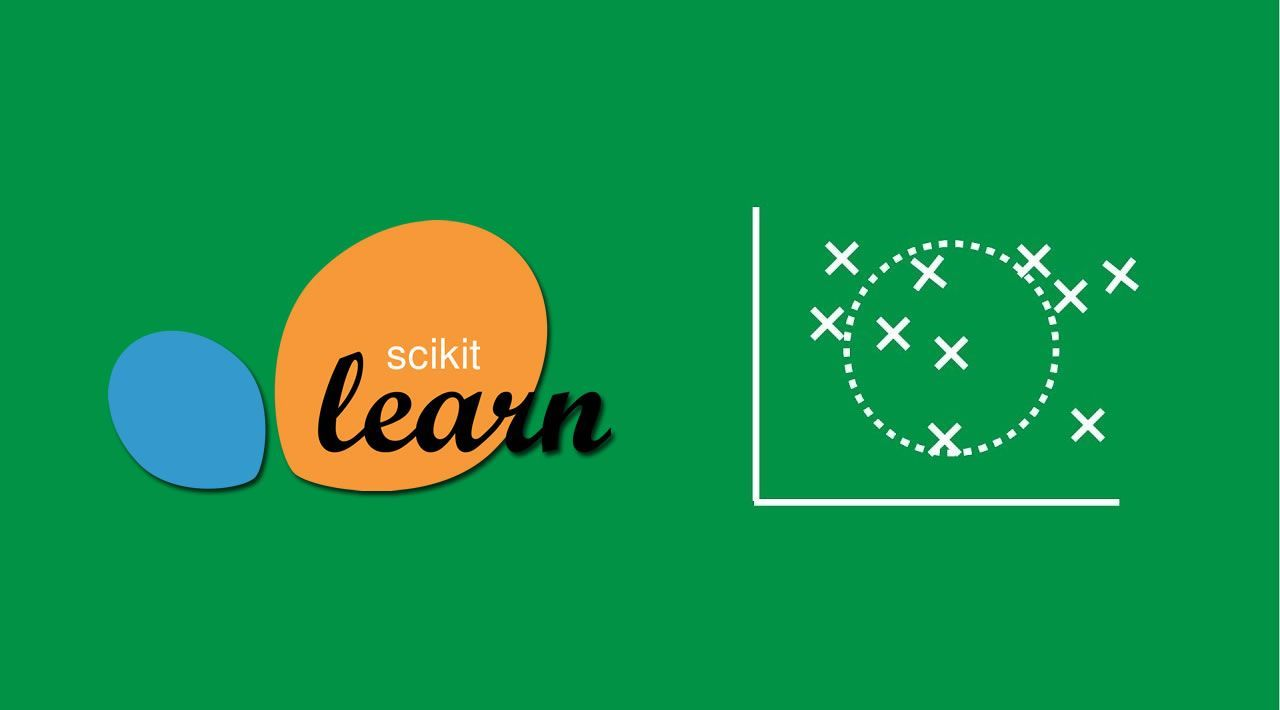

k-NN models work by taking a data point and looking at the ‘k’ closest labeled data points. The data point is then assigned the label of the majority of the ‘k’ closest points.

For example, if k = 5, and 3 of points are ‘green’ and 2 are ‘red’, then the data point in question would be labeled ‘green’, since ‘green’ is the majority 

In [157]:
from sklearn.neighbors import KNeighborsRegressor

#By trying different number of neighbors, highest r2_score is got when n_neighbors=2

knnRegressor = KNeighborsRegressor(n_neighbors=2)
knnRegressor.fit(X_train,y_train)
y_pred = knnRegressor.predict(X_test)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

KNN_r2Score = metrics.r2_score(y_test,y_pred)
print('R2 score: ', KNN_r2Score)

Mean Absolute Error:  0.20780729451489482
Mean Squared Error:  0.10506673574751675
Root Mean Squared Error:  0.32413999405737753
R2 score:  0.8923527145107207


## 12.3 Decision Tree

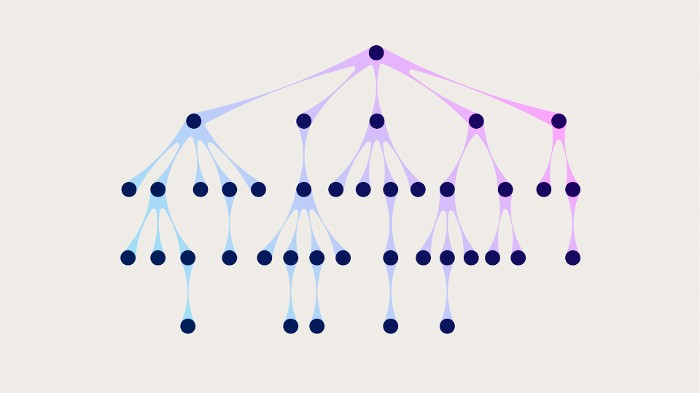

Decision Tree is one of the most commonly used, practical approaches for supervised learning. It can be used to solve both Regression and Classification tasks with the latter being put more into practical application.

It is a tree-structured classifier with three types of nodes. The Root Node is the initial node which represents the entire sample and may get split further into further nodes. The Interior Nodes represent the features of a data set and the branches represent the decision rules. Finally, the Leaf Nodes represent the outcome. This algorithm is very useful for solving decision-related problems.


In [158]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor = DecisionTreeRegressor(random_state=0)
treeRegressor.fit(X_train,y_train)
y_pred = treeRegressor.predict(X_test)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

DT_r2Score = metrics.r2_score(y_test,y_pred)
print('R2 score: ', DT_r2Score)

Mean Absolute Error:  0.1878549828390674
Mean Squared Error:  0.07191253457509247
Root Mean Squared Error:  0.26816512557581473
R2 score:  0.9263212177994631


## 12.4 Random Forest

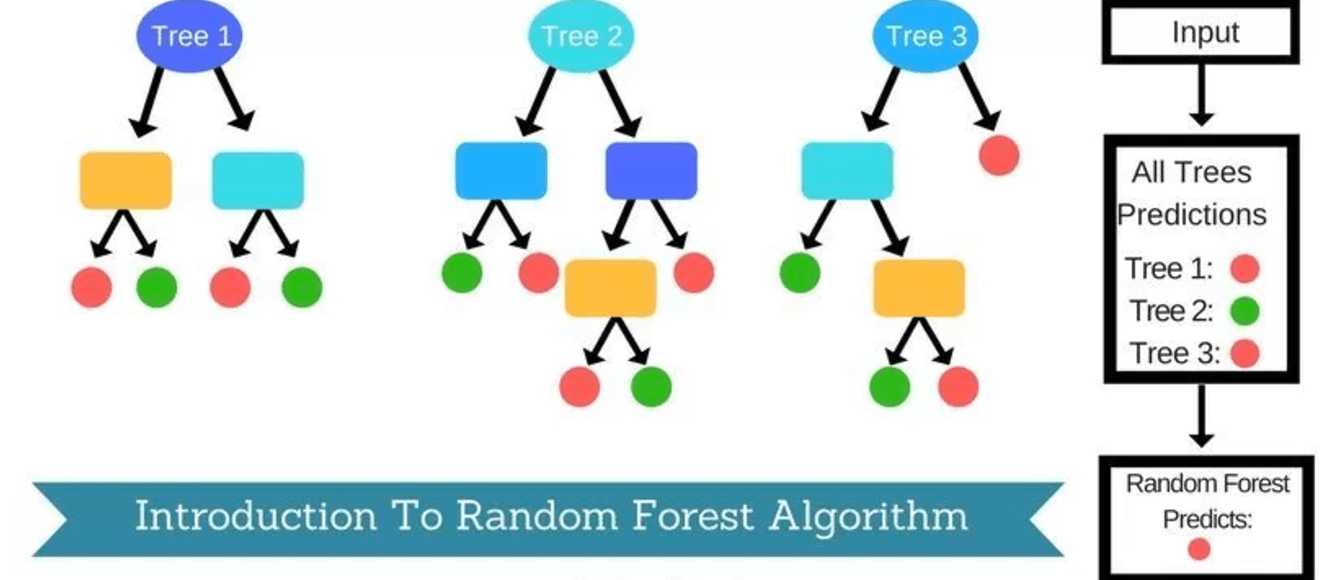

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.

Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.

It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [159]:
from sklearn.ensemble import RandomForestRegressor
forestRegressor = RandomForestRegressor(n_estimators=300,random_state=0)
forestRegressor.fit(X_train,y_train)
y_pred = forestRegressor.predict(X_test)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RF_r2Score = metrics.r2_score(y_test,y_pred)
print('R2 score: ', RF_r2Score)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error:  0.17498109677479412
Mean Squared Error:  0.05845816740584674
Root Mean Squared Error:  0.24178123873834118
R2 score:  0.9401060384036344


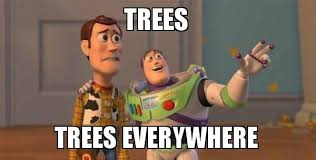

## 12.5 XGBoost

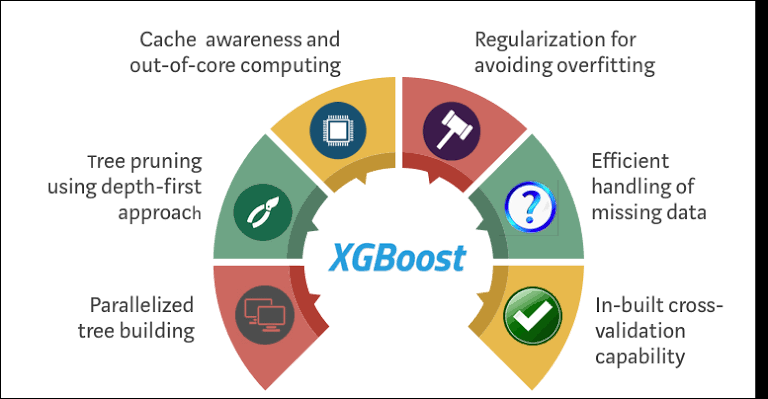

XGBoost is an open source library providing a high-performance implementation of gradient boosted decision trees. An underlying C++ codebase combined with a Python interface sitting on top makes for an extremely powerful yet easy to implement package.

The performance of XGBoost is no joke — it’s become the go-to library for winning many Kaggle competitions. Its gradient boosting implementation is second to none and there’s only more to come as the library continues to garner praise.

In [160]:
import xgboost as xgb
xgbRegressor = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
xgbRegressor.fit(X_train,y_train)
y_pred = xgbRegressor.predict(X_test)

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

XGB_r2Score = metrics.r2_score(y_test,y_pred)
print('R2 score: ', XGB_r2Score)

Mean Absolute Error:  0.16084753742941493
Mean Squared Error:  0.047661047882134724
Root Mean Squared Error:  0.21831410371786503
R2 score:  0.9511683465600802


# 13. Comparision of R2 scores.

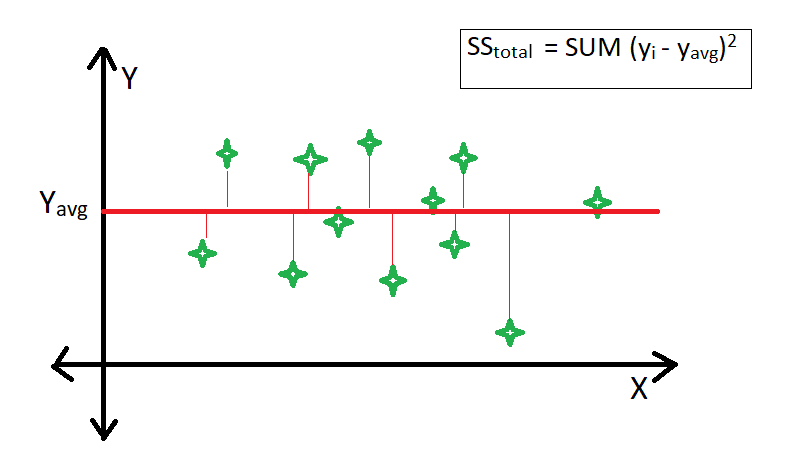

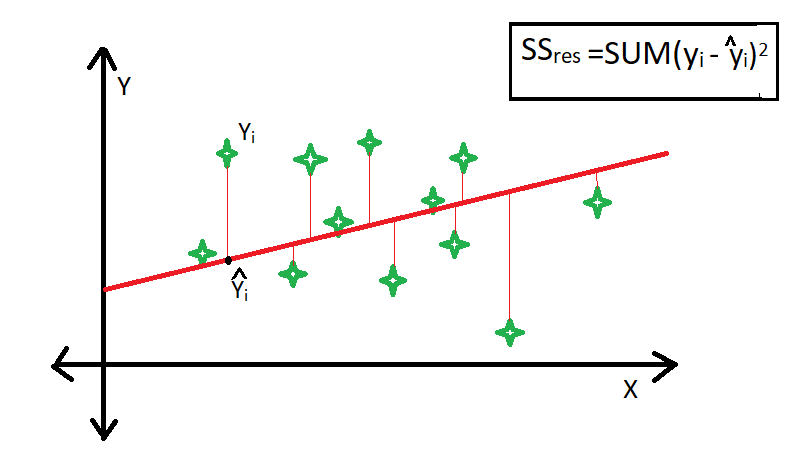

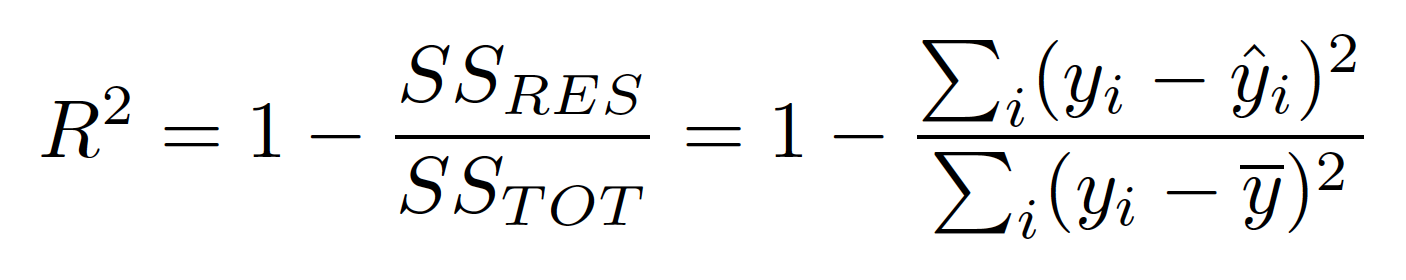

Text(0, 0.5, 'R2 Score')

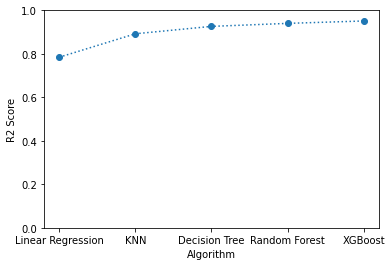

In [161]:
algos = ['Linear Regression','KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
r2Scores = [LR_r2Score, KNN_r2Score, DT_r2Score, RF_r2Score, XGB_r2Score]

plt.plot(algos,r2Scores,marker='o',linestyle=':')
plt.ylim(0,1)
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')